In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torchvision

In [ ]:

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False, num_workers=2
)


Extracting /root/torch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw




Extracting /root/torch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)
print(torch.max(images),torch.max(labels))

torch.Size([30, 1, 28, 28])
torch.Size([30])
tensor(1.) tensor(9)


In [ ]:
len(train_loader)

2000

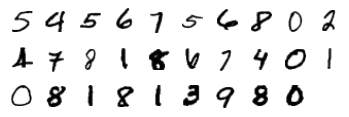

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure()
num_of_images = 29
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 125)
        self.fc3 = nn.Linear(125,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifier()
optimizer = optim.Adadelta(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 1.4590 , epoch: 0

Train set: Average loss: 0.5266 , epoch: 1

Train set: Average loss: 0.3977 , epoch: 2

Train set: Average loss: 0.3495 , epoch: 3

Train set: Average loss: 0.3206 , epoch: 4

Train set: Average loss: 0.2997 , epoch: 5

Train set: Average loss: 0.2821 , epoch: 6

Train set: Average loss: 0.2673 , epoch: 7

Train set: Average loss: 0.2544 , epoch: 8

Train set: Average loss: 0.2422 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 7.3359, Accuracy: 9351/10000 (94%)



# Using Adam Optimizer

In [ ]:
model = classifier()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.2761 , epoch: 0

Train set: Average loss: 0.1916 , epoch: 1

Train set: Average loss: 0.1579 , epoch: 2

Train set: Average loss: 0.1381 , epoch: 3

Train set: Average loss: 0.1390 , epoch: 4

Train set: Average loss: 0.1204 , epoch: 5

Train set: Average loss: 0.1207 , epoch: 6

Train set: Average loss: 0.1068 , epoch: 7

Train set: Average loss: 0.1032 , epoch: 8

Train set: Average loss: 0.1033 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 5.2796, Accuracy: 9698/10000 (97%)



# Using SGD without momentum

In [ ]:
model = classifier()
optimizer = optim.SGD(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 1.0778 , epoch: 0

Train set: Average loss: 0.3618 , epoch: 1

Train set: Average loss: 0.2963 , epoch: 2

Train set: Average loss: 0.2560 , epoch: 3

Train set: Average loss: 0.2245 , epoch: 4

Train set: Average loss: 0.1988 , epoch: 5

Train set: Average loss: 0.1775 , epoch: 6

Train set: Average loss: 0.1600 , epoch: 7

Train set: Average loss: 0.1451 , epoch: 8

Train set: Average loss: 0.1317 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 4.2117, Accuracy: 9605/10000 (96%)



# Using SGD with momentum 

In [ ]:
model = classifier()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.3610 , epoch: 0

Train set: Average loss: 0.1202 , epoch: 1

Train set: Average loss: 0.0779 , epoch: 2

Train set: Average loss: 0.0572 , epoch: 3

Train set: Average loss: 0.0416 , epoch: 4

Train set: Average loss: 0.0328 , epoch: 5

Train set: Average loss: 0.0244 , epoch: 6

Train set: Average loss: 0.0187 , epoch: 7

Train set: Average loss: 0.0133 , epoch: 8

Train set: Average loss: 0.0085 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 1.9903, Accuracy: 9825/10000 (98%)



# Using RMSProp

In [ ]:
model = classifier()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.5543 , epoch: 0

Train set: Average loss: 0.2040 , epoch: 1

Train set: Average loss: 0.1809 , epoch: 2

Train set: Average loss: 0.1690 , epoch: 3

Train set: Average loss: 0.1621 , epoch: 4

Train set: Average loss: 0.1567 , epoch: 5

Train set: Average loss: 0.1594 , epoch: 6

Train set: Average loss: 0.1608 , epoch: 7

Train set: Average loss: 0.1572 , epoch: 8

Train set: Average loss: 0.1605 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 8.9249, Accuracy: 9563/10000 (96%)



#Weight Initilization

#Xavier

In [ ]:
class classifierweightinit(nn.Module):
    def __init__(self):
        super(classifierweightinit, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        nn.init.xavier_normal_(self.fc1.weight)
        self.fc2 = nn.Linear(512, 125)
        nn.init.xavier_normal_(self.fc2.weight)
        self.fc3 = nn.Linear(125,10)
        nn.init.xavier_normal_(self.fc3.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifierweightinit()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.2708 , epoch: 0

Train set: Average loss: 0.1789 , epoch: 1

Train set: Average loss: 0.1521 , epoch: 2

Train set: Average loss: 0.1444 , epoch: 3

Train set: Average loss: 0.1304 , epoch: 4

Train set: Average loss: 0.1187 , epoch: 5

Train set: Average loss: 0.1164 , epoch: 6

Train set: Average loss: 0.1020 , epoch: 7

Train set: Average loss: 0.1086 , epoch: 8

Train set: Average loss: 0.1120 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 5.6882, Accuracy: 9677/10000 (97%)



# Normal Weight Initilization

In [ ]:
class classifiernormalweightinit(nn.Module):
    def __init__(self):
        super(classifiernormalweightinit, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        nn.init.normal_(self.fc1.weight, mean=0, std=1)
        self.fc2 = nn.Linear(512, 125)
        nn.init.normal_(self.fc2.weight, mean=0, std=1)
        self.fc3 = nn.Linear(125,10)
        nn.init.normal_(self.fc3.weight, mean=0, std=1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifiernormalweightinit()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 13.7155 , epoch: 0

Train set: Average loss: 1.1047 , epoch: 1

Train set: Average loss: 0.8807 , epoch: 2

Train set: Average loss: 0.7787 , epoch: 3

Train set: Average loss: 0.8296 , epoch: 4

Train set: Average loss: 0.7243 , epoch: 5

Train set: Average loss: 0.7446 , epoch: 6

Train set: Average loss: 0.7346 , epoch: 7

Train set: Average loss: 0.6600 , epoch: 8

Train set: Average loss: 0.6168 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 21.7068, Accuracy: 8419/10000 (84%)



# Uniform Weight Initilisation

In [ ]:
class classifieruniformweightinit(nn.Module):
    def __init__(self):
        super(classifieruniformweightinit, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        nn.init.uniform_(self.fc1.weight, a=0, b=1)
        self.fc2 = nn.Linear(512, 125)
        nn.init.uniform_(self.fc2.weight, a=0, b=1)
        self.fc3 = nn.Linear(125,10)
        nn.init.uniform_(self.fc3.weight, a=0, b=1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifieruniformweightinit()
optimizer = optim.Adam(model.parameters(), lr=0.01)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 497.8061 , epoch: 0

Train set: Average loss: 0.5314 , epoch: 1

Train set: Average loss: 0.2822 , epoch: 2

Train set: Average loss: 0.4026 , epoch: 3

Train set: Average loss: 0.4748 , epoch: 4

Train set: Average loss: 0.5302 , epoch: 5

Train set: Average loss: 0.4973 , epoch: 6

Train set: Average loss: 0.4573 , epoch: 7

Train set: Average loss: 0.4239 , epoch: 8

Train set: Average loss: 0.3578 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 13.9188, Accuracy: 9211/10000 (92%)



# Different Learning Rates

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 125)
        self.fc3 = nn.Linear(125,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.2182 , epoch: 0

Train set: Average loss: 0.0851 , epoch: 1

Train set: Average loss: 0.0564 , epoch: 2

Train set: Average loss: 0.0431 , epoch: 3

Train set: Average loss: 0.0313 , epoch: 4

Train set: Average loss: 0.0287 , epoch: 5

Train set: Average loss: 0.0213 , epoch: 6

Train set: Average loss: 0.0210 , epoch: 7

Train set: Average loss: 0.0168 , epoch: 8

Train set: Average loss: 0.0170 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 2.9609, Accuracy: 9807/10000 (98%)



# Learning Rate scheduler StepLR

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 125)
        self.fc3 = nn.Linear(125,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.2184 , epoch: 0

Train set: Average loss: 0.0855 , epoch: 1

Train set: Average loss: 0.0568 , epoch: 2

Train set: Average loss: 0.0413 , epoch: 3

Train set: Average loss: 0.0317 , epoch: 4

Train set: Average loss: 0.0290 , epoch: 5

Train set: Average loss: 0.0217 , epoch: 6

Train set: Average loss: 0.0224 , epoch: 7

Train set: Average loss: 0.0158 , epoch: 8

Train set: Average loss: 0.0166 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 3.1183, Accuracy: 9780/10000 (98%)



# Lerning Rate Scheduler MultiStepLR

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 125)
        self.fc3 = nn.Linear(125,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifier()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[5,9], gamma=0.1)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))



Train set: Average loss: 0.2172 , epoch: 0

Train set: Average loss: 0.0874 , epoch: 1

Train set: Average loss: 0.0575 , epoch: 2

Train set: Average loss: 0.0428 , epoch: 3

Train set: Average loss: 0.0340 , epoch: 4

Train set: Average loss: 0.0275 , epoch: 5

Train set: Average loss: 0.0235 , epoch: 6

Train set: Average loss: 0.0205 , epoch: 7

Train set: Average loss: 0.0180 , epoch: 8

Train set: Average loss: 0.0155 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    output = model(data)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 1.0528, Accuracy: 9791/10000 (98%)



# Saving the model

In [ ]:
torch.save(model,"model.pt")

# Latent Space Reprentation from autoencoder

In [ ]:
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded,encoded

In [ ]:
modelautoencoder = Autoencoder_Linear()
optimizer = optim.RMSprop(modelautoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 5
output = []
for epoch in range(epochs):
  loss = 0
  for batch_features, _ in train_loader:
    batch_features = batch_features.view(-1, 784)
    optimizer.zero_grad()
    outputs,_ = modelautoencoder(batch_features)
    train_loss = criterion(outputs, batch_features)
    train_loss.backward()
    optimizer.step()
    loss += train_loss.item()
  output.append([batch_features,outputs])
  loss = loss / len(train_loader)
  print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/5, loss = 0.035780
epoch : 2/5, loss = 0.022685
epoch : 3/5, loss = 0.019270
epoch : 4/5, loss = 0.017178
epoch : 5/5, loss = 0.015786


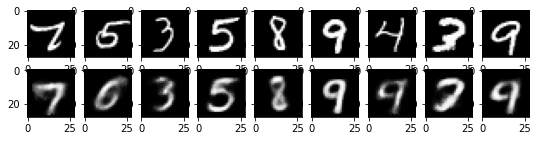

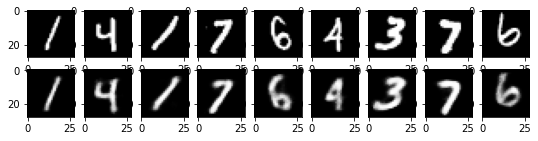

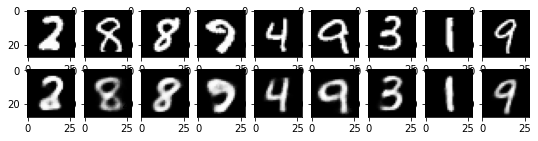

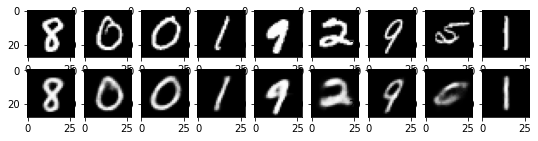

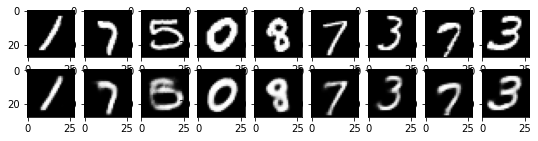

In [ ]:
import matplotlib.pyplot as plt

for k in output:
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = k[0].detach().numpy()
    recon = k[1].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

In [ ]:
class classifier(nn.Module):
    def __init__(self):
        super(classifier, self).__init__()
        self.fc1 = nn.Linear(16, 14)
        self.fc2 = nn.Linear(14,10)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [ ]:
model = classifier()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
model.train()
for epoch in range(10):
  running_loss = 0.0
  for i, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    data = data.view(-1,784)
    outputs,encoded_train = modelautoencoder(data)
    output = model(encoded_train)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  running_loss /= len(train_loader)
  print('\nTrain set: Average loss: {:.4f} , epoch: {}'.format(running_loss,epoch))


Train set: Average loss: 0.3637 , epoch: 0

Train set: Average loss: 0.2550 , epoch: 1

Train set: Average loss: 0.2454 , epoch: 2

Train set: Average loss: 0.2408 , epoch: 3

Train set: Average loss: 0.2374 , epoch: 4

Train set: Average loss: 0.2343 , epoch: 5

Train set: Average loss: 0.2320 , epoch: 6

Train set: Average loss: 0.2311 , epoch: 7

Train set: Average loss: 0.2277 , epoch: 8

Train set: Average loss: 0.2297 , epoch: 9


In [ ]:
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    data = data.view(-1,784)
    outputs,encoded_test = modelautoencoder(data)
    output = model(encoded_test)
    test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),100. * correct / len(test_loader.dataset)))


Test set: Average loss: 2.3331, Accuracy: 9279/10000 (93%)

